# Generate Trajectory for Morris Method
This script will generate the Morris Method Trajectories for performing sensitivity analysis of the Leading Edge Erosion Emulation model.

## Generate and Save Inputs

In [1]:
# For testing with active control of the blade pitch
from SALib.sample.morris.morris import sample
import numpy as np

# Define the model inputs
# recall that our model takes input vectors of the form:

# [wind_direction,wind_speed,blade_angle,air_density,erosion_blade1_region1,..._region6,
# erosion_blade2_region1,...,_region6,erosion_blade3_region1,..._region6]

problem = {
    'num_vars': 21,
    'names': ['wd_dir', 'wd_spd','air_dens',
              'b1er1','b1er2','b1er3','b1er4','b1er5','b1er6',
             'b2er1','b2er2','b2er3','b2er4','b2er5','b2er6',
             'b3er1','b3er2','b3er3','b3er4','b3er5','b3er6'],
    'bounds': [[0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],]
}

# N = number of trajectories to generate
N = 30;

# num_levels = number of partitions for the input dimensions
num_levels = 4;

# optimal trajectories
opt = 5;

# Generate samples
param_values = sample(problem, N, num_levels, opt)

# Save the outputs
np.savetxt("Morris21_5T.txt", param_values)

## Experiment Intended Ranges:
- Wind Direction `[0, 15]`
- Wind Speed `[3, 20]`
- Air Density `[.95*1.225, 1.05*1.225]`
- Erosion Levels `[0, 1]`
- - Regions 1-2 `*.25`
- - Regions 3-4 `*.5`
- - Regions 5-6 `*1`

## Run the Analysis

In [3]:
from SALib.analyze.morris import analyze
import pandas as pd
import numpy as np

problem = {
    'num_vars': 21,
    'names': ['wd_dir', 'wd_spd','air_dens',
              'b1er1','b1er2','b1er3','b1er4','b1er5','b1er6',
             'b2er1','b2er2','b2er3','b2er4','b2er5','b2er6',
             'b3er1','b3er2','b3er3','b3er4','b3er5','b3er6'],
    'bounds': [[0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],]
}

inputs = np.loadtxt("Morris21_6T.txt", float)

# Load in the corresponding Morris results file
morris_exp_data = pd.read_table("Morris216tmean.txt",delimiter = ',')

In [4]:
morris_exp_data.info()
allnames = morris_exp_data.columns.tolist()
iter = -1;
for i in allnames:
    iter = iter + 1
    print(iter, i)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Columns: 158 entries, Time to GenTq
dtypes: float64(157), int64(1)
memory usage: 163.1 KB
0 Time
1 WindHubAngXY
2 WindHubVelMag
3 WindHubVelX
4 BldPitch1
5 BldPitch2
6 BldPitch3
7 YawPzn
8 LSShftFxa
9 LSShftFya
10 LSShftFza
11 LSShftMxa
12 LSSTipMya
13 LSSTipMza
14 LSSGagMya
15 LSSGagMza
16 HSShftTq
17 HSShftPwr
18 LSSTipVxa
19 LSSGagVxa
20 RootFxb1
21 RootFxb2
22 RootFxb3
23 RootFyb1
24 RootFyb2
25 RootFyb3
26 RootFzc1
27 RootFzc2
28 RootFzc3
29 RootMxb1
30 RootMxb2
31 RootMxb3
32 RootMyb1
33 RootMyb2
34 RootMyb3
35 RootMzc1
36 RootMzc2
37 RootMzc3
38 TipDxc1
39 TipDxc2
40 TipDxc3
41 TipDyc1
42 TipDyc2
43 TipDyc3
44 TipDzc1
45 TipDzc2
46 TipDzc3
47 TipDxb1
48 TipDxb2
49 TipDxb3
50 TipDyb1
51 TipDyb2
52 TipDyb3
53 TipALxb1
54 TipALxb2
55 TipALxb3
56 TipALyb1
57 TipALyb2
58 TipALyb3
59 TipALzb1
60 TipALzb2
61 TipALzb3
62 TipRDxb1
63 TipRDxb2
64 TipRDxb3
65 TipRDyb1
66 TipRDyb2
67 TipRDyb3
68 HSShftV
69 RotPwr
70 Yaw

In [77]:
n = 8; 
# Output name
outname = allnames[n]
outputs = morris_exp_data[[allnames[n]]].to_numpy()
allnames[n]

# just in case something became a nan-run this
for i in range(len(outputs)):
    if np.isnan(outputs[i]) == 1:
        print('Output',i,'is nan')

outputs = np.nan_to_num(outputs, 0)

In [78]:
Si = analyze(problem, inputs, outputs, conf_level=0.95,
                    print_to_console=True, num_levels=4)

                  mu     mu_star       sigma  mu_star_conf
wd_dir    -14.019461   50.737514   60.755523     22.025428
wd_spd    203.574368  361.856510  418.770854    173.087228
air_dens  248.211062  248.942092  605.542761    453.944333
b1er1      -3.889916    7.238985   14.392038      9.768687
b1er2       4.973597    9.763640   17.499421     10.108895
b1er3      -2.525902    4.818827    9.018856      5.805108
b1er4      -7.085624    8.387408   12.290606      8.657298
b1er5      -8.732409   12.872361   17.653069     10.564194
b1er6       5.134830    7.739885   12.230380      8.309349
b2er1     -16.664759   16.664759    9.809857      6.438894
b2er2      -1.083797    6.549754    8.515208      3.515330
b2er3      -2.863611    9.018742   16.205199      9.149085
b2er4     186.663567  207.228530  483.233850    344.077879
b2er5    -536.041052  538.838449  821.693266    606.678084
b2er6    -307.063708  309.202793  633.682871    465.399908
b3er1    -194.922583  210.893171  492.010109    364.2726

## Plot the Results

In [75]:
import matplotlib.pyplot as plt

# We want to plot the mu_star on the xaxis and the sigma on the y axis

# But first let's try something out...
stor = np.zeros((2,21))
stor[0,:] = Si["mu_star"]
stor[1,:] = Si["sigma"]

vals = np.zeros((21,))

for i in range(21):
    vals[i] = np.linalg.norm(stor[:,i])
tempvals = vals
# List off the top 5 influential inputs...
for j in range(5):
    ind = np.argmax(tempvals)
    print(Si["names"][ind])
    tempvals[ind] = 0


b2er5
wd_spd
b2er6
air_dens
b3er4


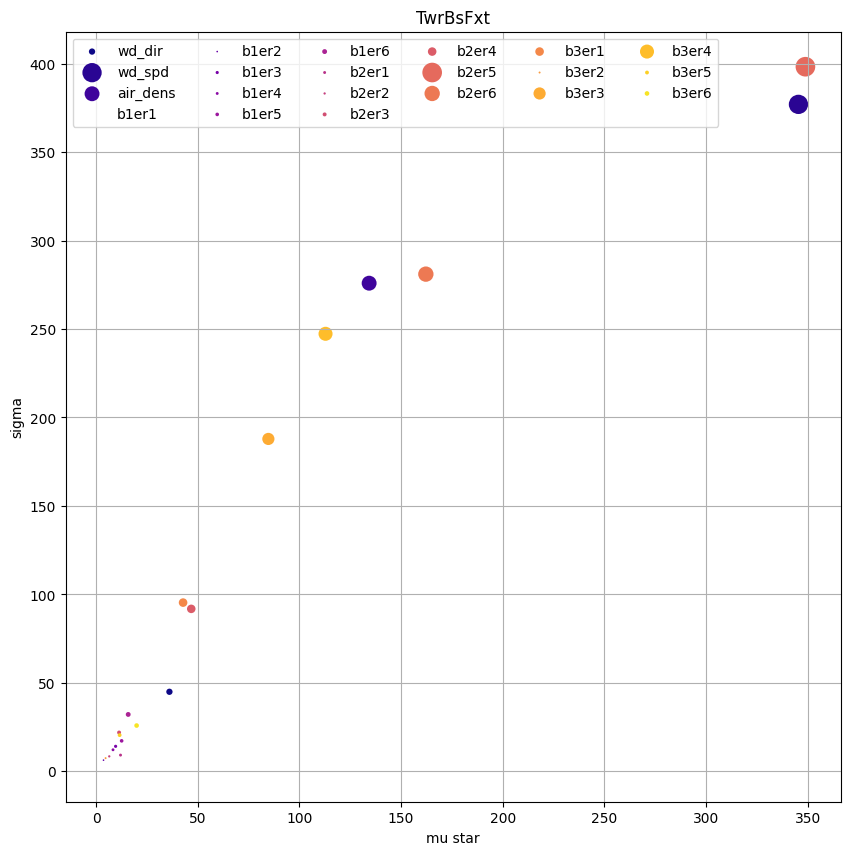

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

stor = np.zeros((2,21))
stor[0,:] = Si["mu_star"]
stor[1,:] = Si["sigma"]

vals = np.zeros((21,))
for i in range(21):
    vals[i] = np.linalg.norm(stor[:,i])

cmap = plt.cm.plasma
norm = plt.Normalize(vmin=0, vmax=21)
nomr1 = plt.Normalize(vmin=min(vals),vmax=max(vals))
for i in range(len(Si["names"])):
    cl = cmap(norm(i))
    scale = 200*nomr1(vals[i])
    ax.scatter(Si["mu_star"][i], Si["sigma"][i], color=cl, s=scale, label=Si["names"][i], edgecolors='none')

ax.legend(loc="upper left",ncols=6)
ax.grid(True)
ax.set_xlabel("mu star")
ax.set_ylabel("sigma")
ax.set_title(outname)
plt.show()